<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/3_1%EA%B0%95_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

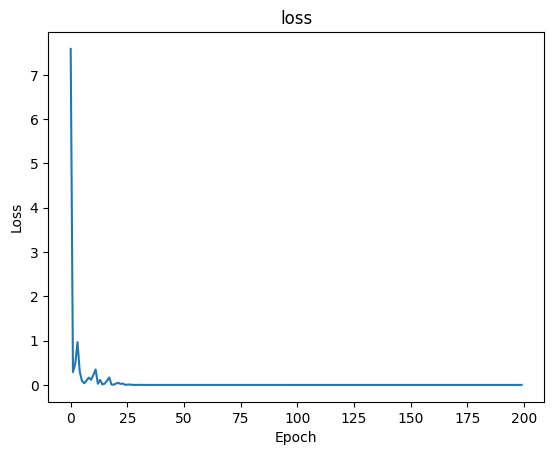

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


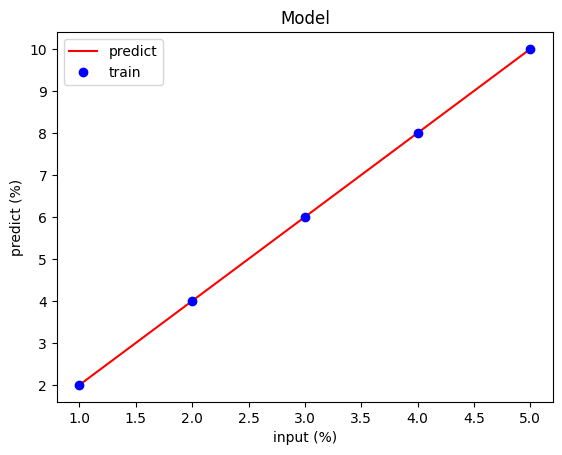

5/5 - 0s - 18ms/step - loss: 0.0000e+00
loss :  0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
input : 1, output : [[2.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
input : 2, output : [[4.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
input : 3, output : [[6.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
input : 4, output : [[8.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
input : 5, output : [[10.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
input : 6, output : [[11.999999]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
input : 7, output : [[14.000002]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
input : 99, output : [[198.]]


In [2]:
# 단순한 선형 회귀 예제 (텐서플로우2)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# x(입력), y(결과) 데이터
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([2, 4, 6, 8, 10])

# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()
# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(5, input_dim=1, activation='linear'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(1))

# 모델 구조 확인
#model.summary()

# Optimizer - Stochastic gradient descent - 확률적 경사 하강법
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# cost/loss funcion
# loss를 mean_squared_error 방식을 사용한다는 의미로 mse 라고 써도 인식한다.
model.compile(loss='mean_squared_error', optimizer=sgd)

#fit the line
# 텐서 플로우 1과 다르게 세션을 만들어서 돌릴 필요가 없다.
# 간단하게 만들어서 학습을 시작한다.
# verbose = "auto", 0, 1 또는 2, 0 = 무음, 1 = 진행률 표시줄, 2 = 한 줄.
# "auto"대부분의 경우 기본값은 1

hist = model.fit(x_train, y_train, batch_size=1, epochs=200, verbose=0)

#print(hist.history['loss'])
#print(hist.history['acc'])
#print(hist.history['val_loss'])
#print(hist.history['val_acc'])
#loss : 훈련 손실값
#acc : 훈련 정확도
#val_loss : 검증 손실값
#val_acc : 검증 정확도


# 훈련 과정 시각화 (손실)
plt.plot(hist.history['loss'])
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 모델 시각화
line_x = np.arange(min(x_train), max(x_train), 0.01)
line_y = model.predict(line_x)
#print(line_x)
#print(line_y)

plt.plot(line_x, line_y, 'r-')
plt.plot(x_train, y_train, 'bo')
plt.title('Model')
plt.xlabel('input (%)')
plt.ylabel('predict (%)')
plt.legend(['predict', 'train'], loc='upper left')
plt.show()

# 손실 함수 계산
loss = model.evaluate(x_train, y_train, batch_size=1, verbose=2)
print('loss : ', loss)


# 모델 테스트
for i in range(1, 8):
    print('input : ', i, ', output : ', model.predict(np.array([i])), sep='')  # 입력 i에 대한 예측 값 출력

print('input : ', 99, ', output : ', model.predict(np.array([99])), sep='')
